# Pymaceuticals Inc.
---

### Analysis

- Based on the four treatments tested on mice, it seems that Capomulin and Ramicane	provide the most variance in Tumor volume, and the highest decrease over average timepoints. In addition, the most mice were tested in quantity with the Capomulin and Ramicane drug regimens, allowing for increased normal distribution of the tumor volume data and a more reliable standard error of measure observed. 

There is minimal difference between gender on mice tested, with a nominal 2% difference on the mice tested. Overall, female mice, however, seemed to show the most variance in tumor volume than their male counterparts. Potentially signaling that females responded better to the treatment thanthe males. It can also be noted that the weight of the mouse heavily affected the average size of the tumors, specifically, the heavier the weight seemed to have a positive coorelation with increased tumor volume prior to treatment. This suggests that the most affected mice in treatment would also be the heaviest. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharm_combined = pd.merge(study_results, mouse_metadata, how="left",on=["Mouse ID","Mouse ID"])
pharm_combined

# Display the data table for preview
pharm_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = pharm_combined['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_ID = pharm_combined.duplicated()

duplicated_items = pharm_combined.loc[duplicated_mice_ID]
duplicated_items

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pharm_combined[pharm_combined['Mouse ID']=="g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharm_combined_cleaned = pharm_combined[pharm_combined['Mouse ID']!="g989"]
pharm_combined_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_updated = pharm_combined_cleaned['Mouse ID'].nunique()
mouse_count_updated

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = pharm_combined_cleaned.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = pharm_combined_cleaned.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_std = pharm_combined_cleaned.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_var = pharm_combined_cleaned.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_sem = pharm_combined_cleaned.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


# Assemble the resulting series into a single summary DataFrame.

tumor_summary_stat = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                                   "Median Tumor Volume":tumor_median,
                                   "Tumor Volume Variance":tumor_var,
                                   "Tumor Volume Std. Dev.":tumor_std,
                                   "Tumor Volume Std. Err.":tumor_sem})
tumor_summary_stat


C:\Users\jessi\AppData\Local\Temp\ipykernel_8948\1841479328.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = pharm_combined_cleaned.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
C:\Users\jessi\AppData\Local\Temp\ipykernel_8948\1841479328.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_median = pharm_combined_cleaned.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
C:\Users\jessi\AppData\Local\Temp\ipykernel_8948\1841479328.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to Fa

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_stat_table2 = pharm_combined_cleaned.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':["mean", "median","var","std","sem"]})
tumor_stat_table2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mouse_drug = pharm_combined_cleaned.groupby('Drug Regimen').count()['Mouse ID']
mouse_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

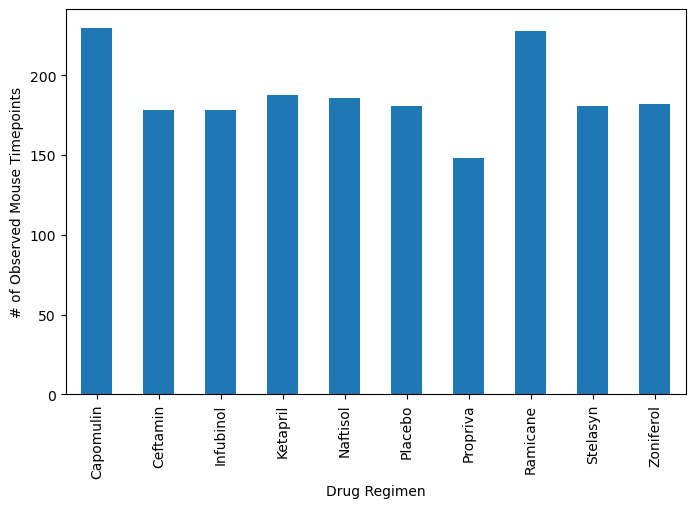

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#dataframe.plot() method

bar_plot = mouse_drug.plot(kind="bar",figsize=(8,5))

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

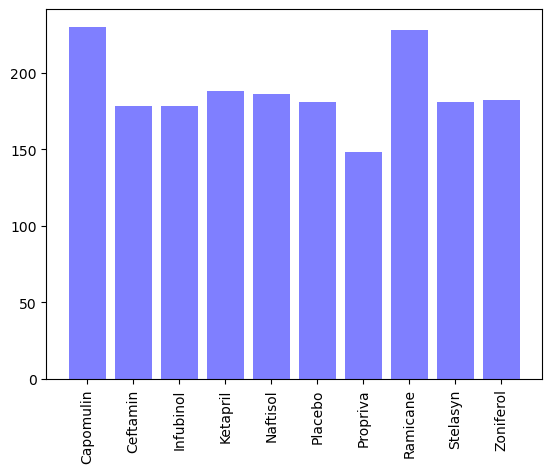

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouse_drug = pharm_combined_cleaned.groupby('Drug Regimen').count()['Mouse ID']

#pyplot method
#set x-axis & y-axis

x_axis = mouse_drug.index

y_axis = mouse_drug.values

tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color='b',alpha=0.5, align="center")
plt.xticks(rotation=90)

plt.show()


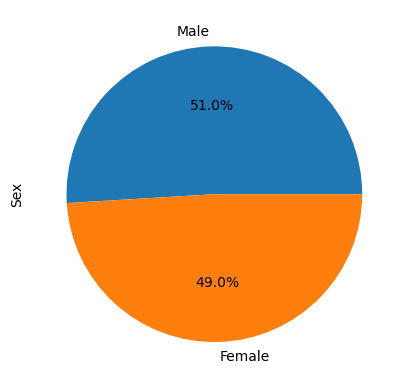

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = pharm_combined_cleaned['Sex'].value_counts()

gender.plot(kind="pie", autopct="%1.1f%%")
plt.show()

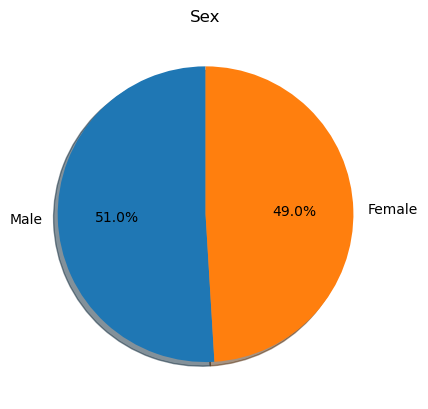

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender.values, labels=gender.index, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pharm_combined_cleaned.groupby('Mouse ID').max()['Timepoint']
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoints = pd.merge(max_timepoint, pharm_combined_cleaned, how="left",on=["Mouse ID","Timepoint"])
merged_timepoints.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Tumor = []

for drug in Treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    drug_list = merged_timepoints[merged_timepoints['Drug Regimen'] == drug]
    
    # add subset 
    Tumor.append(drug_list['Tumor Volume (mm3)'])
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    quartiles = drug_list['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_tumor = drug_list.loc[(drug_list['Tumor Volume (mm3)'] < lower_bound) | (drug_list['Tumor Volume (mm3)'] > upper_bound)]
    outlier_tumor
    
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile rang

C:\Users\jessi\AppData\Local\Temp\ipykernel_8948\3723350949.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


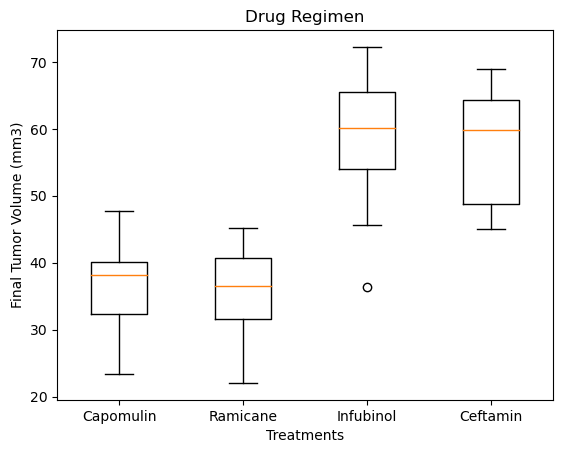

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#need more than one box plot on same chart 
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Treatments')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
#ax1.set_p(ax1['fliers'],color='red',marker='o')
#ax1.set_fliers(color='red')
#input the list I made with my for loop
ax1.boxplot(Tumor)
plt.show()

## Line and Scatter Plots

In [17]:
mouse_ID = pharm_combined_cleaned[pharm_combined_cleaned['Mouse ID']=="r944"]

In [18]:
mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
239,r944,0,45.000000,0,Capomulin,Male,12,25
432,r944,5,45.737145,0,Capomulin,Male,12,25
630,r944,10,46.544292,0,Capomulin,Male,12,25
761,r944,15,47.373423,0,Capomulin,Male,12,25
1001,r944,20,43.225671,1,Capomulin,Male,12,25
1118,r944,25,41.086991,1,Capomulin,Male,12,25
1412,r944,30,41.680791,1,Capomulin,Male,12,25
1556,r944,35,40.401765,2,Capomulin,Male,12,25
1650,r944,40,41.042045,2,Capomulin,Male,12,25
1888,r944,45,41.581521,2,Capomulin,Male,12,25


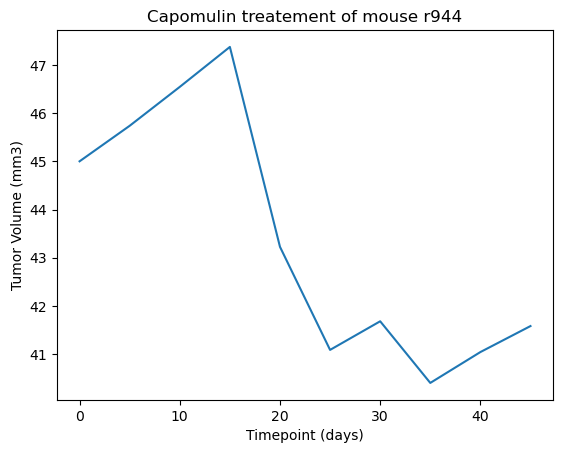

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

x_axis = mouse_ID['Timepoint']

y_axis = mouse_ID['Tumor Volume (mm3)']

plt.plot(x_axis,y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatement of mouse r944')
plt.show()

In [20]:
capo_data = pharm_combined_cleaned[pharm_combined_cleaned['Drug Regimen']=="Capomulin"]

In [21]:
capo_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [22]:
weight_mean = capo_data.groupby('Mouse ID').mean()['Weight (g)']

C:\Users\jessi\AppData\Local\Temp\ipykernel_8948\1723794289.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_mean = capo_data.groupby('Mouse ID').mean()['Weight (g)']


In [23]:
tumor_mean = capo_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

C:\Users\jessi\AppData\Local\Temp\ipykernel_8948\4018140934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = capo_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)']


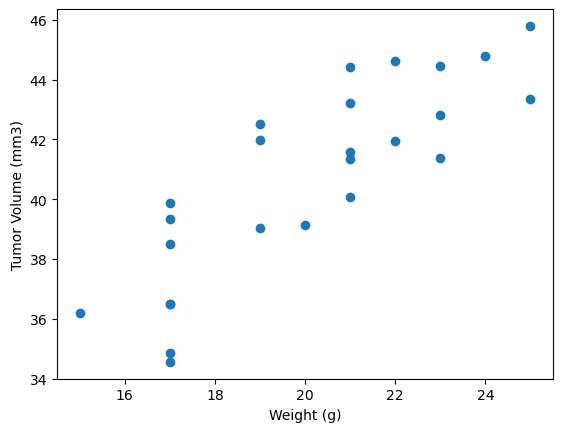

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#x and y have to be the same size in data range, so you need the average weight AND average tumor volume

x_values = weight_mean
y_values = tumor_mean
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


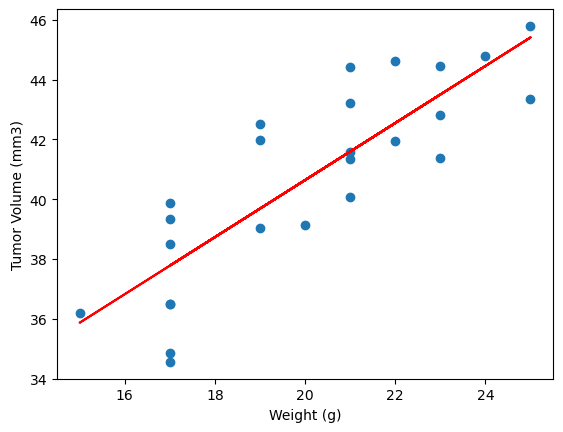

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = weight_mean
y_values = tumor_mean

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")


plt.show()